In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [3]:
stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1020 entries, 2021-01-04 to 2025-01-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1020 non-null   float64
 1   (High, AAPL)    1020 non-null   float64
 2   (Low, AAPL)     1020 non-null   float64
 3   (Open, AAPL)    1020 non-null   float64
 4   (Volume, AAPL)  1020 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.8 KB


In [4]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.544220,130.651208,123.952903,130.563205,143301900
2021-01-05,128.108780,128.822625,125.585912,126.035732,97664900
2021-01-06,123.796448,128.147907,123.581318,124.891648,155088000
2021-01-07,128.020798,128.715081,125.028563,125.517491,109578200
2021-01-08,129.125763,129.692921,127.346060,129.497338,105158200
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400


In [8]:
stock_data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', name='Date', length=1020, freq=None)

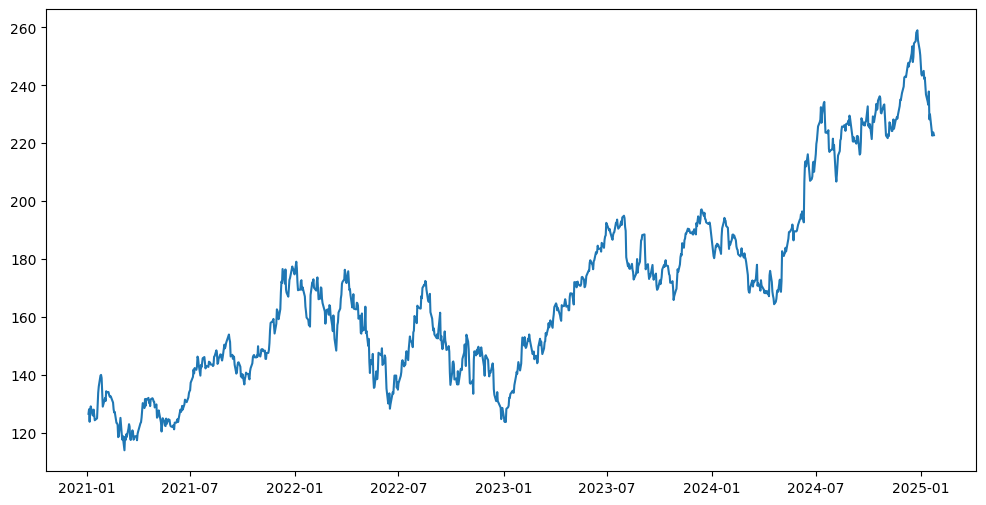

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.show()

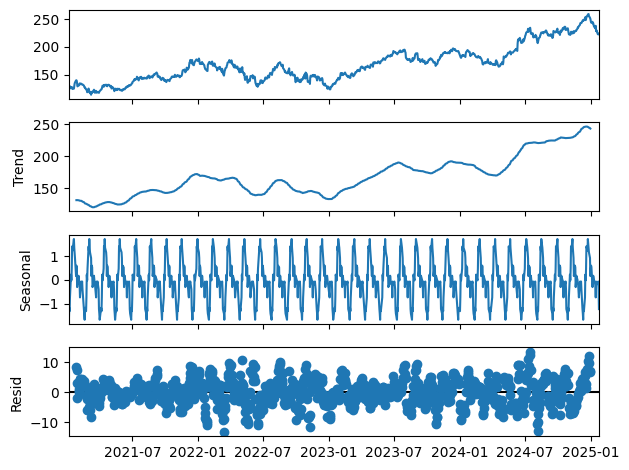

In [11]:
dc_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)
dc_additive.plot()
plt.show()
trends_additive = dc_additive.trend
seasonal_additive = dc_additive.seasonal
residual_additive = dc_additive.resid

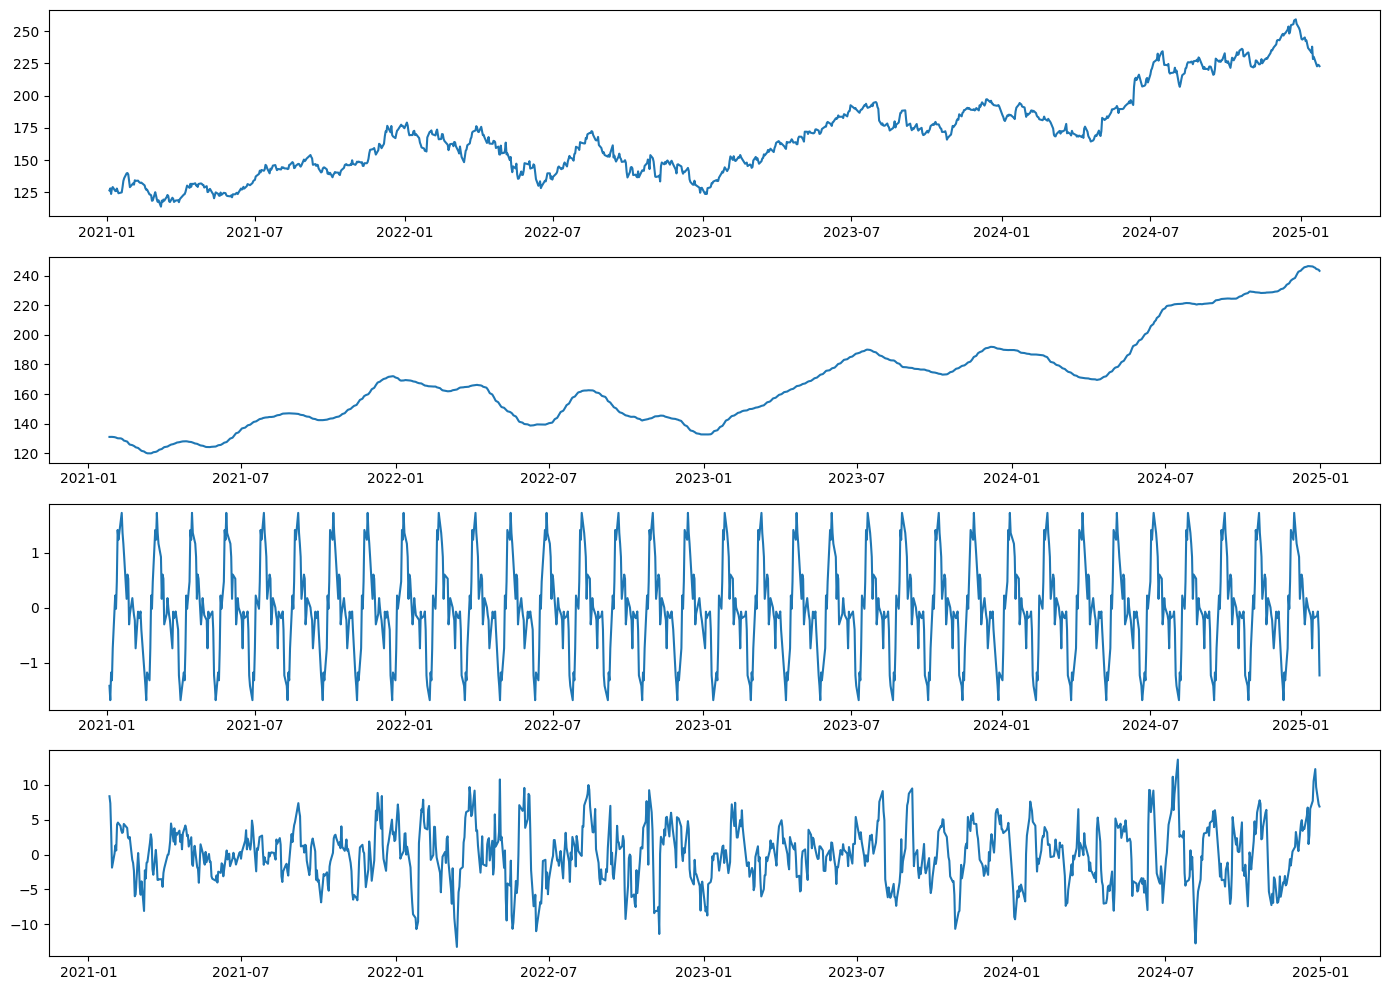

In [16]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'])
plt.subplot(412)
plt.plot(trends_additive)
plt.subplot(413)
plt.plot(seasonal_additive)
plt.subplot(414)
plt.plot(residual_additive)
plt.tight_layout()
plt.show()